## MORIN FIGURE:

Comments from Debby:

I am looking for 5 stacked panels – outlined below in the 26-Aug email.
 
Reminder –  For panels 3,4 and 5 - it’s the anomaly plots from seasar.png and seastemp.png (the bottom panels not the top). 
{We could decide to include one that is the absolute annual cycle for context – maybe T - but let’s try as below first.}
 
I’d like to see what it looks like if the width of the seasonal bins match the time intervals too (rather than equal).
 
## FROM DEBBY 
Full page AGU fig. Portrait. 
 
Evie has sent you the data for top panel.   
 
chl time series with the t-axis as 5 years may not work as a visual as well as the 1-yr overlay Evie already has.  I don’t have those data – they are from Elise – not SSC – direct obs.  Lets see.

Top panel: Fig.4a Evie’s thesis (Years of concern) – {how to handle bars for 2012 and 2018?}
 
Second panel: Fig.5a thesis – Obs Chl vs time (x-axis=5 years; spring bloom period shaded grey in each year)
 
Third panel: coloured mosaic T vs time 5yr (4 averaging periods as you showed me today)
 
Fourth panel: coloured mosaic Omega vs time
 
Fifth panel: coloured mosaic pH vs time.
 
Ask questions..
Thanks again so much – its looking *great*!
D.

## FROM EVIE:
The data for the top panel is in the excel doc.
For the second it's in the csv.

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import pickle
from cmocean import cm
import pandas as pd
import arrow
import glob
from scipy.io import loadmat
%matplotlib inline

#### Panel a - Figure 4a, years of concern

easiest to just copy-paste numbers because small data, orig data is in morin_data/Morinetal_Figure4.xlsx
the

<BarContainer object of 7 artists>

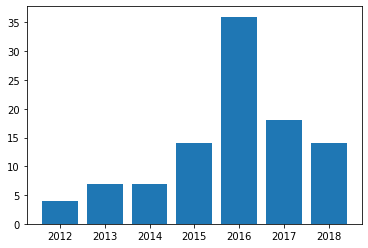

In [24]:
## PANEL FIGURE 4a 

yrs = np.arange(2012,2019,1)
percs = [4,7,7,14,36,18,14]

#### Panel b - Figure 5(e, I think)

data in ./morin_data/bloomTiming_chl_ugL.csv

(1830,)
[ 180  545  910 1275]


Text(0, 0.5, 'Chl ($\\mu$g L$^{-1}$)')

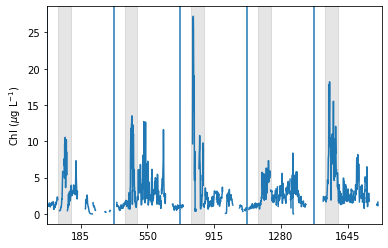

In [50]:
bloomtim = pd.read_csv('./morin_data/bloomTiming_chl_ugL.csv')

# print(bloomtim.head())
# print(bloomtim.keys())

## concatenatemebaby

bt13 = bloomtim['2013.0'][:].to_numpy()
bt14 = bloomtim['2014.0'][:].to_numpy()
bt15 = bloomtim['2015.0'][:].to_numpy()
bt16 = bloomtim['2016.0'][:].to_numpy()
bt17 = bloomtim['2017.0'][:].to_numpy()

bt_5yr = np.concatenate((bt13,bt14,bt15,bt16,bt17),axis=0)
print(np.shape(bt_5yr))
days = np.arange(0,1830,1)


print(xticks)
plt.plot(days,bt_5yr)
for i in range(0,5):
    plt.axvspan((365*i)+60, (365*i)+130, alpha=0.1, color='k')
    plt.axvline(x = 365*i)
    plt.xticks(txticks); #plt.set_xticklabels(txticklabels)

plt.xlim([0,1830])
plt.ylabel('Chl ($\mu$g L$^{-1}$)')


### panels c-e - meshes of T, OmA, pH, in that order

these calcs are not in trivial to prepare so they are done in make_meshes_of_timeseries_*
those notebooks also have the visualizations 
     
     data in mesh_ncs/*_anom_mesh
     

In [66]:
T_anom = nc.Dataset('./mesh_ncs/T_anom_mesh.nc')
OmA_anom = nc.Dataset('./mesh_ncs/OmA_anom_mesh.nc')
pH_anom = nc.Dataset('./mesh_ncs/pH_anom_mesh.nc')

T_anom_dat = T_anom['anom_mesh'][:]
OmA_anom_dat = OmA_anom['anom_mesh'][:]
pH_anom_dat = pH_anom['anom_mesh'][:]

seasths_leap = np.array([1,61,132,243,367])
seasths_py_leap = seasths_leap-1

print(seasths_py_leap)
seasths_py2 = seasths_py_leap + 366
seasths_py3 = seasths_py_leap + 366*2
seasths_py4 = seasths_py_leap + 366*3
seasths_py5 = seasths_py_leap + 366*4
lastday = np.zeros([1])
lastday[0]=1830
seasths_5yr = np.concatenate((seasths_py_leap[0:4],seasths_py2[0:4],\
                             seasths_py3[0:4],seasths_py4[0:4],seasths_py5[0:4],lastday))

seasths_5yr = (seasths_5yr.astype(int))
txticklabels = ['2013','2014','2015','2016','2017']
txticks = np.arange(185,365*5+185, 365)

[  0  60 131 242 366]


#### 2013 spring anomaly at Lasqueti  = mean spring value at Lasqueti -  2013 spring value at Lasqueti

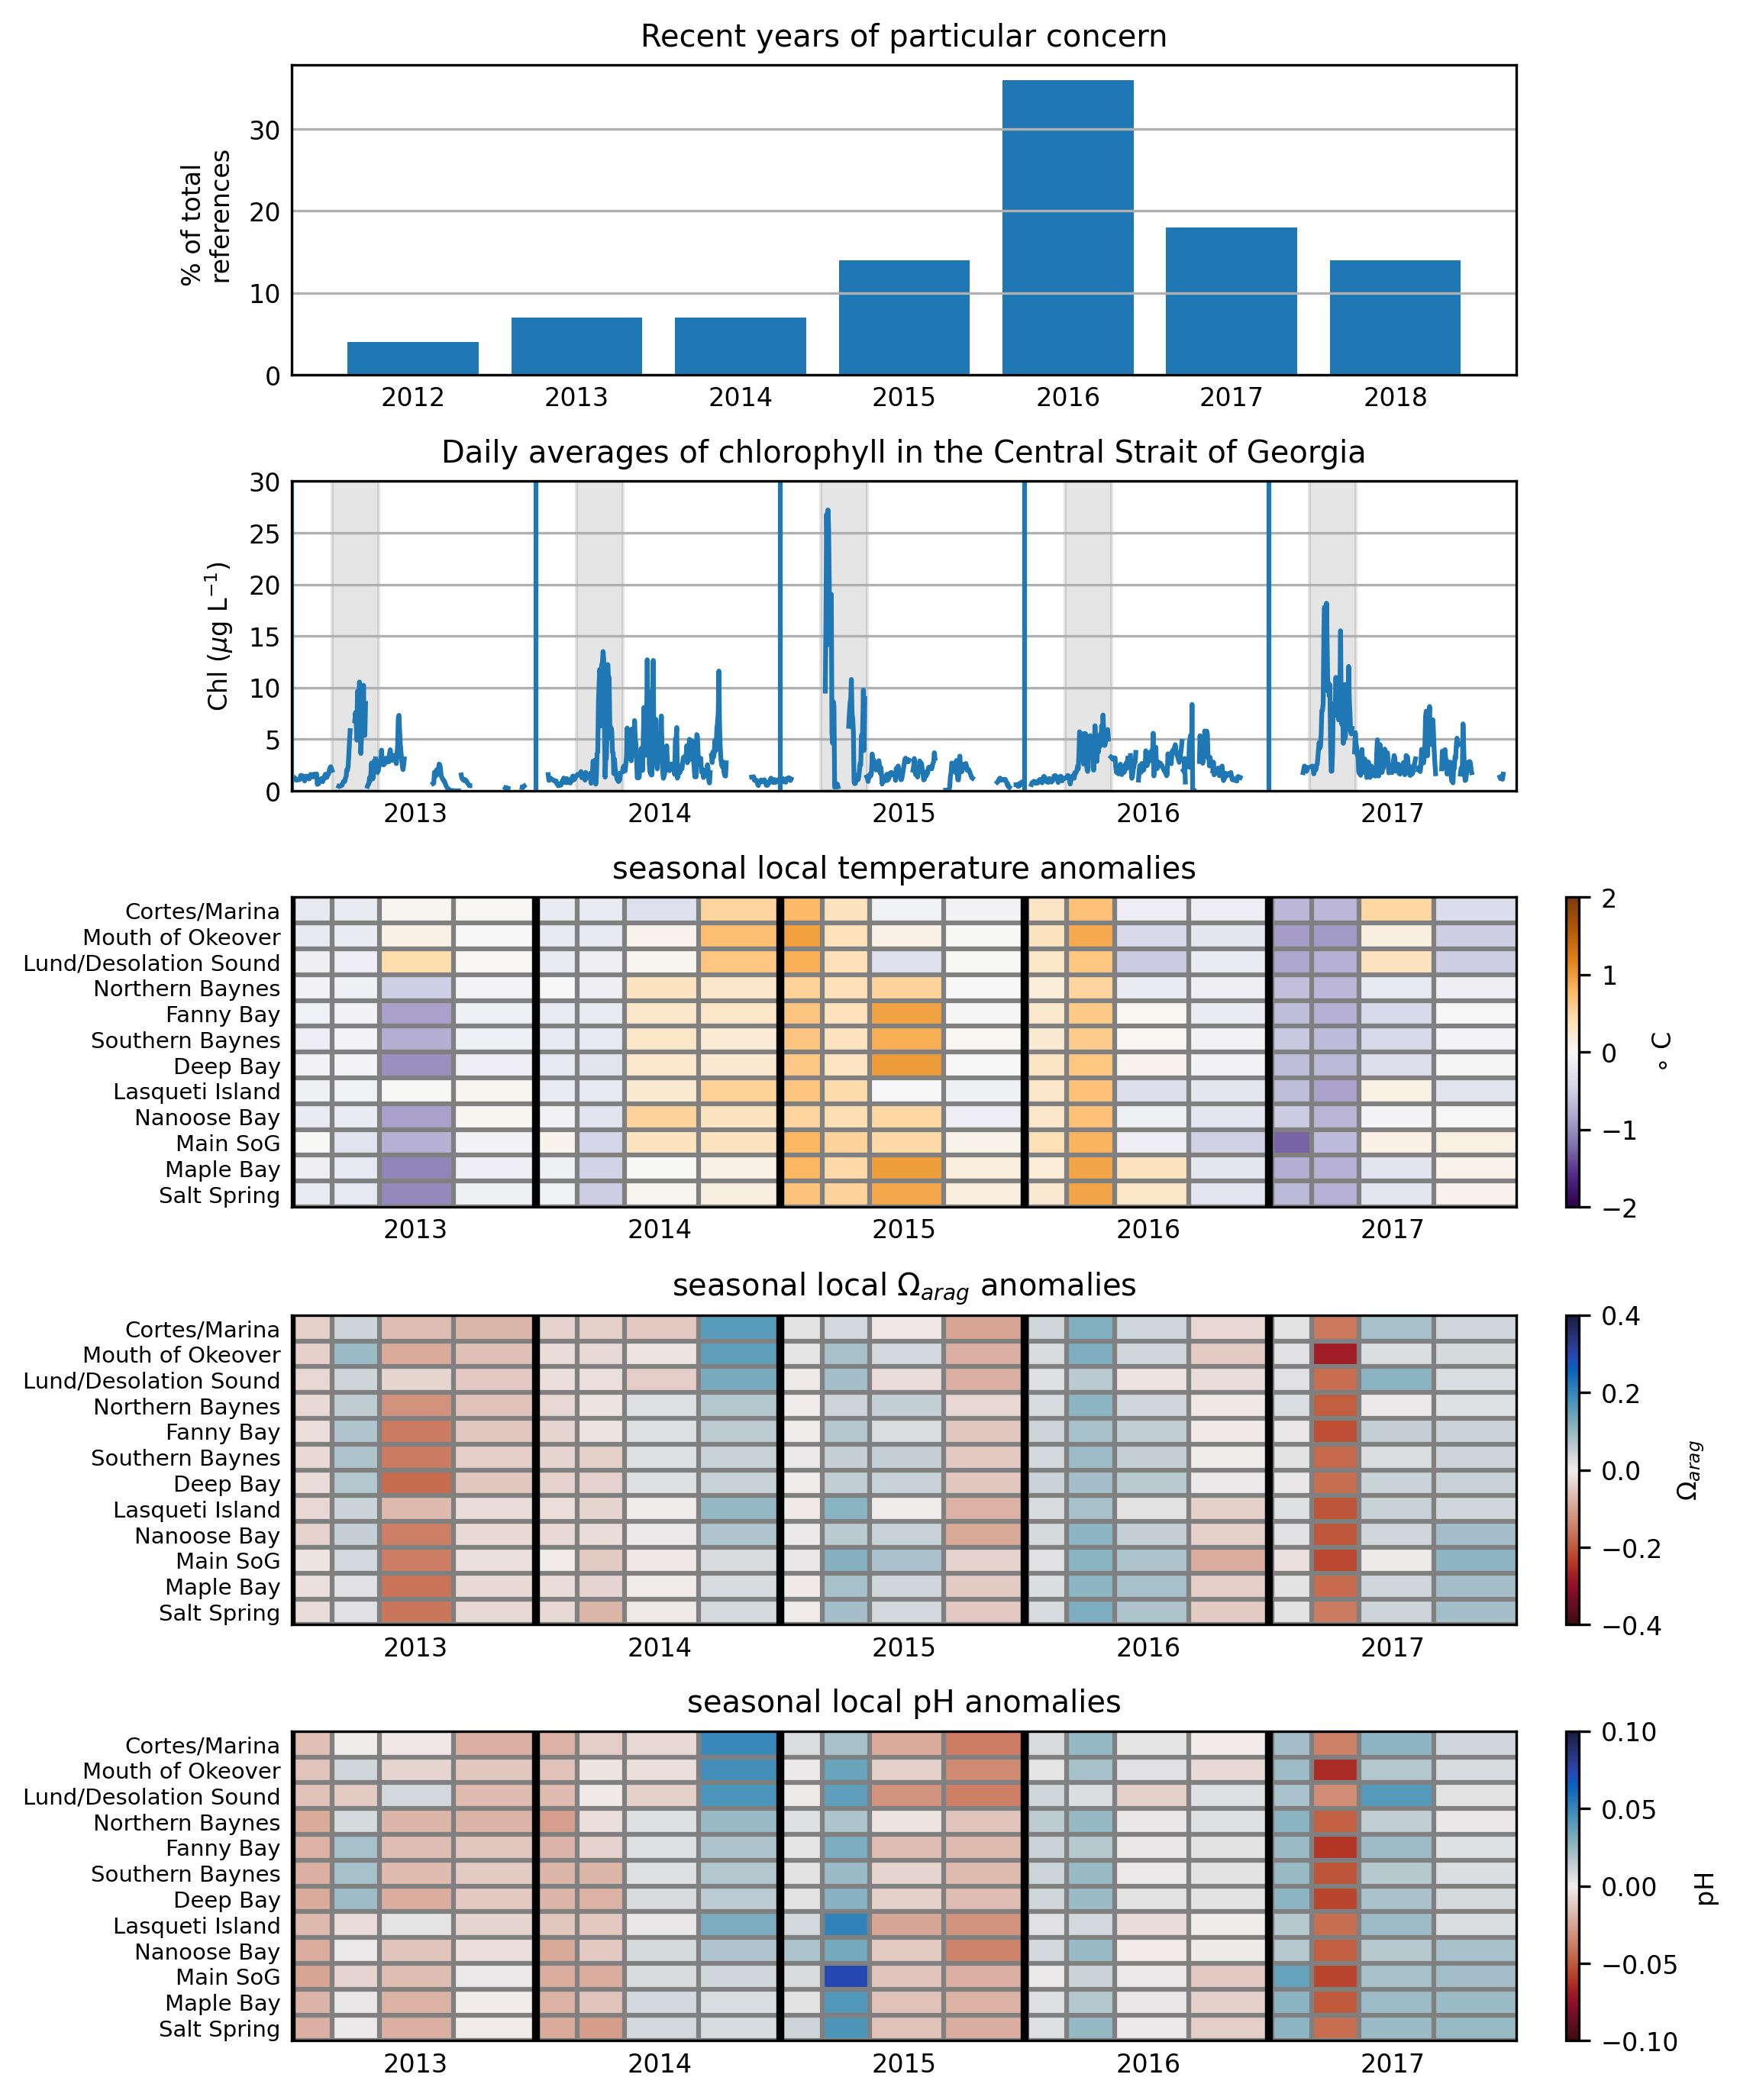

In [103]:
#FIGURE SIZE: Full page = 190 mm x 230 mm
plt.rcParams.update({'font.size': 8})
# font = {'family' : 'normal',
# 'weight' : 'normal',
# 'size'   : 12}


fig, axs = plt.subplots(5,1, figsize=(19/2.54, 23/2.54), dpi = 300, constrained_layout=True,\
                        facecolor='w', edgecolor='k')
axs = axs.ravel()

#fig 4a
axs[0].bar(yrs,percs)
axs[0].set_ylabel('% of total \n references')
axs[0].set_title('Recent years of particular concern')
axs[0].grid(axis = 'y')
#fig 5e
txticklabels = ['2013','2014','2015','2016','2017']
txticks = np.arange(185,365*5+185, 365)
axs[1].plot(days,bt_5yr)

for i in range(0,5):
    axs[1].axvspan((365*i)+60, (365*i)+130, alpha=0.1, color='k')
    axs[1].axvline(x = 365*i)
axs[1].set_xticks(txticks); #plt.set_xticklabels(txticklabels)
axs[1].set_xticklabels(txticklabels);
axs[1].set_xlim([0,1830])
axs[1].set_ylabel('Chl ($\mu$g L$^{-1}$)')
axs[1].set_title('Daily averages of chlorophyll in the Central Strait of Georgia')
axs[1].grid(axis = 'y')
axs[1].set_ylim([0,30])

c = axs[2].pcolor(T_anom_dat,\
                  vmin = -2, vmax = 2,\
                  linewidths=2, cmap = 'PuOr_r')
axs[2].set_yticks(np.arange(0.5,12.5,1))
w = axs[2].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'], fontsize = 7)
for i in range(0,12):
    axs[2].axhline(y=i,color = 'grey')
for j in range(0,20):
    axs[2].axvline(x=seasths_5yr[j],color = 'grey')
for j2 in range(0,5):
    axs[2].axvline(x=365*j2,color = 'k', linewidth = 2.5)
axs[2].set_xticks(txticks)
axs[2].set_xticklabels(txticklabels)
axs[2].tick_params(which='both', length=0, width=2, direction='in')
fig.colorbar(c, ax=axs[2], label = '$\circ$ C', orientation="vertical")


####
c = axs[3].pcolor(OmA_anom_dat,\
                  vmin = -0.4, vmax = 0.4,\
                  linewidths=2, cmap = cm.balance_r)
axs[3].set_yticks(np.arange(0.5,12.5,1))
w = axs[3].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'], fontsize = 7)
for i in range(0,12):
    axs[3].axhline(y=i,color = 'grey')
for j in range(0,20):
    axs[3].axvline(x=seasths_5yr[j],color = 'grey')
for j2 in range(0,5):
    axs[3].axvline(x=365*j2,color = 'k', linewidth = 2.5)
axs[3].set_xticks(txticks)
axs[3].set_xticklabels(txticklabels)
axs[3].tick_params(which='both', length=0, width=2, direction='in')
fig.colorbar(c, ax=axs[3], label = '$\Omega_{arag}$', orientation="vertical")


c = axs[4].pcolor(pH_anom_dat,\
                  vmin = -0.1, vmax = 0.1,\
                  linewidths=2, cmap = cm.balance_r)
axs[4].set_yticks(np.arange(0.5,12.5,1))
w = axs[4].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'], fontsize = 7)
for i in range(0,12):
    axs[4].axhline(y=i,color = 'grey')
for j in range(0,20):
    axs[4].axvline(x=seasths_5yr[j],color = 'grey')
for j2 in range(0,5):
    axs[4].axvline(x=365*j2,color = 'k', linewidth = 2.5)
axs[4].set_xticks(txticks)
axs[4].set_xticklabels(txticklabels)

fig.colorbar(c, ax=axs[4], label = 'pH', orientation="vertical")
# plt.tight_layout()

axs[2].set_title('seasonal local temperature anomalies')
axs[3].set_title('seasonal local $\Omega_{arag}$ anomalies')
axs[4].set_title('seasonal local pH anomalies')

for i in range(0,5):
    axs[i].tick_params(which='both', length=0, width=2, direction='in')
    
plt.savefig('Morin_figure.jpg')